In [ ]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

percentiles_ingresos = pd.read_csv("../datos reales/percentiles_ingresos_PPA_2011.csv")

def Sintetizador(tam = 100):
    def Sintesis(ingresos):
        sintesis = 0
        for ini in range(0,100,tam):
            rango = ingresos.iloc[ini:(ini+tam)]
            peso = np.sum(rango['pop_share'])
            avg_rango = np.sum(rango['avg_welfare'] * rango['pop_share'])/peso
            sintesis += np.log(avg_rango)*peso
        return sintesis
    return Sintesis

def GenerarMuestra(datos_originales, umbral):
    muestras = dict()
    for year in sorted(datos_originales['year'].unique()):
        datos_anio = datos_originales[datos_originales['year']==year]
        paises = datos_anio['country_code'].unique()
        
        paises = list(filter(lambda x : 
            sum(datos_anio['country_code']==x)==100, paises
        ))
    
        if len(paises) < umbral: continue
        
        grupos_in = datos_anio.groupby('country_code')
        
        muestras[year] = []
        
        for country in paises:
            tams = (10,20,100)
            muestra = []
            for (i,tam) in enumerate(tams):
                muestra.append(Sintetizador(tam)(grupos_in.get_group(country)))
            muestras[year].append((country,muestra,Sintetizador(1)(grupos_in.get_group(country))))
    return muestras

percentiles_ingresos_ni = percentiles_ingresos[
    np.array(percentiles_ingresos['welfare_type']=='income') &
    np.array(percentiles_ingresos['reporting_level']=='national')
]

percentiles_ingresos_comp = percentiles_ingresos[
    np.array(percentiles_ingresos['welfare_type']=='consumption') &
    np.array(percentiles_ingresos['reporting_level']=='national')
]

muestras_ingreso = GenerarMuestra(percentiles_ingresos_ni,30)
muestras_consumo = GenerarMuestra(percentiles_ingresos_comp, 30)

muestras = [muestras_ingreso, muestras_consumo]

def GenerarSeries(muestras, metrica):
    xs = list(sorted(muestras.keys()))
    ys = []
    for x in xs:
        muestra = muestras[x]
        series = []
        for i in range(3):
            a = [item[1][i] for item in muestra]
            b = [float(item[2]) for item in muestra]
            series.append(metrica(a,b))
        ys.append(tuple(series))
    return xs,ys


#fig.savefig("../figuras/figura_6_pearson_ingreso_consumo_esp_vida_total.png",bbox_inches='tight')

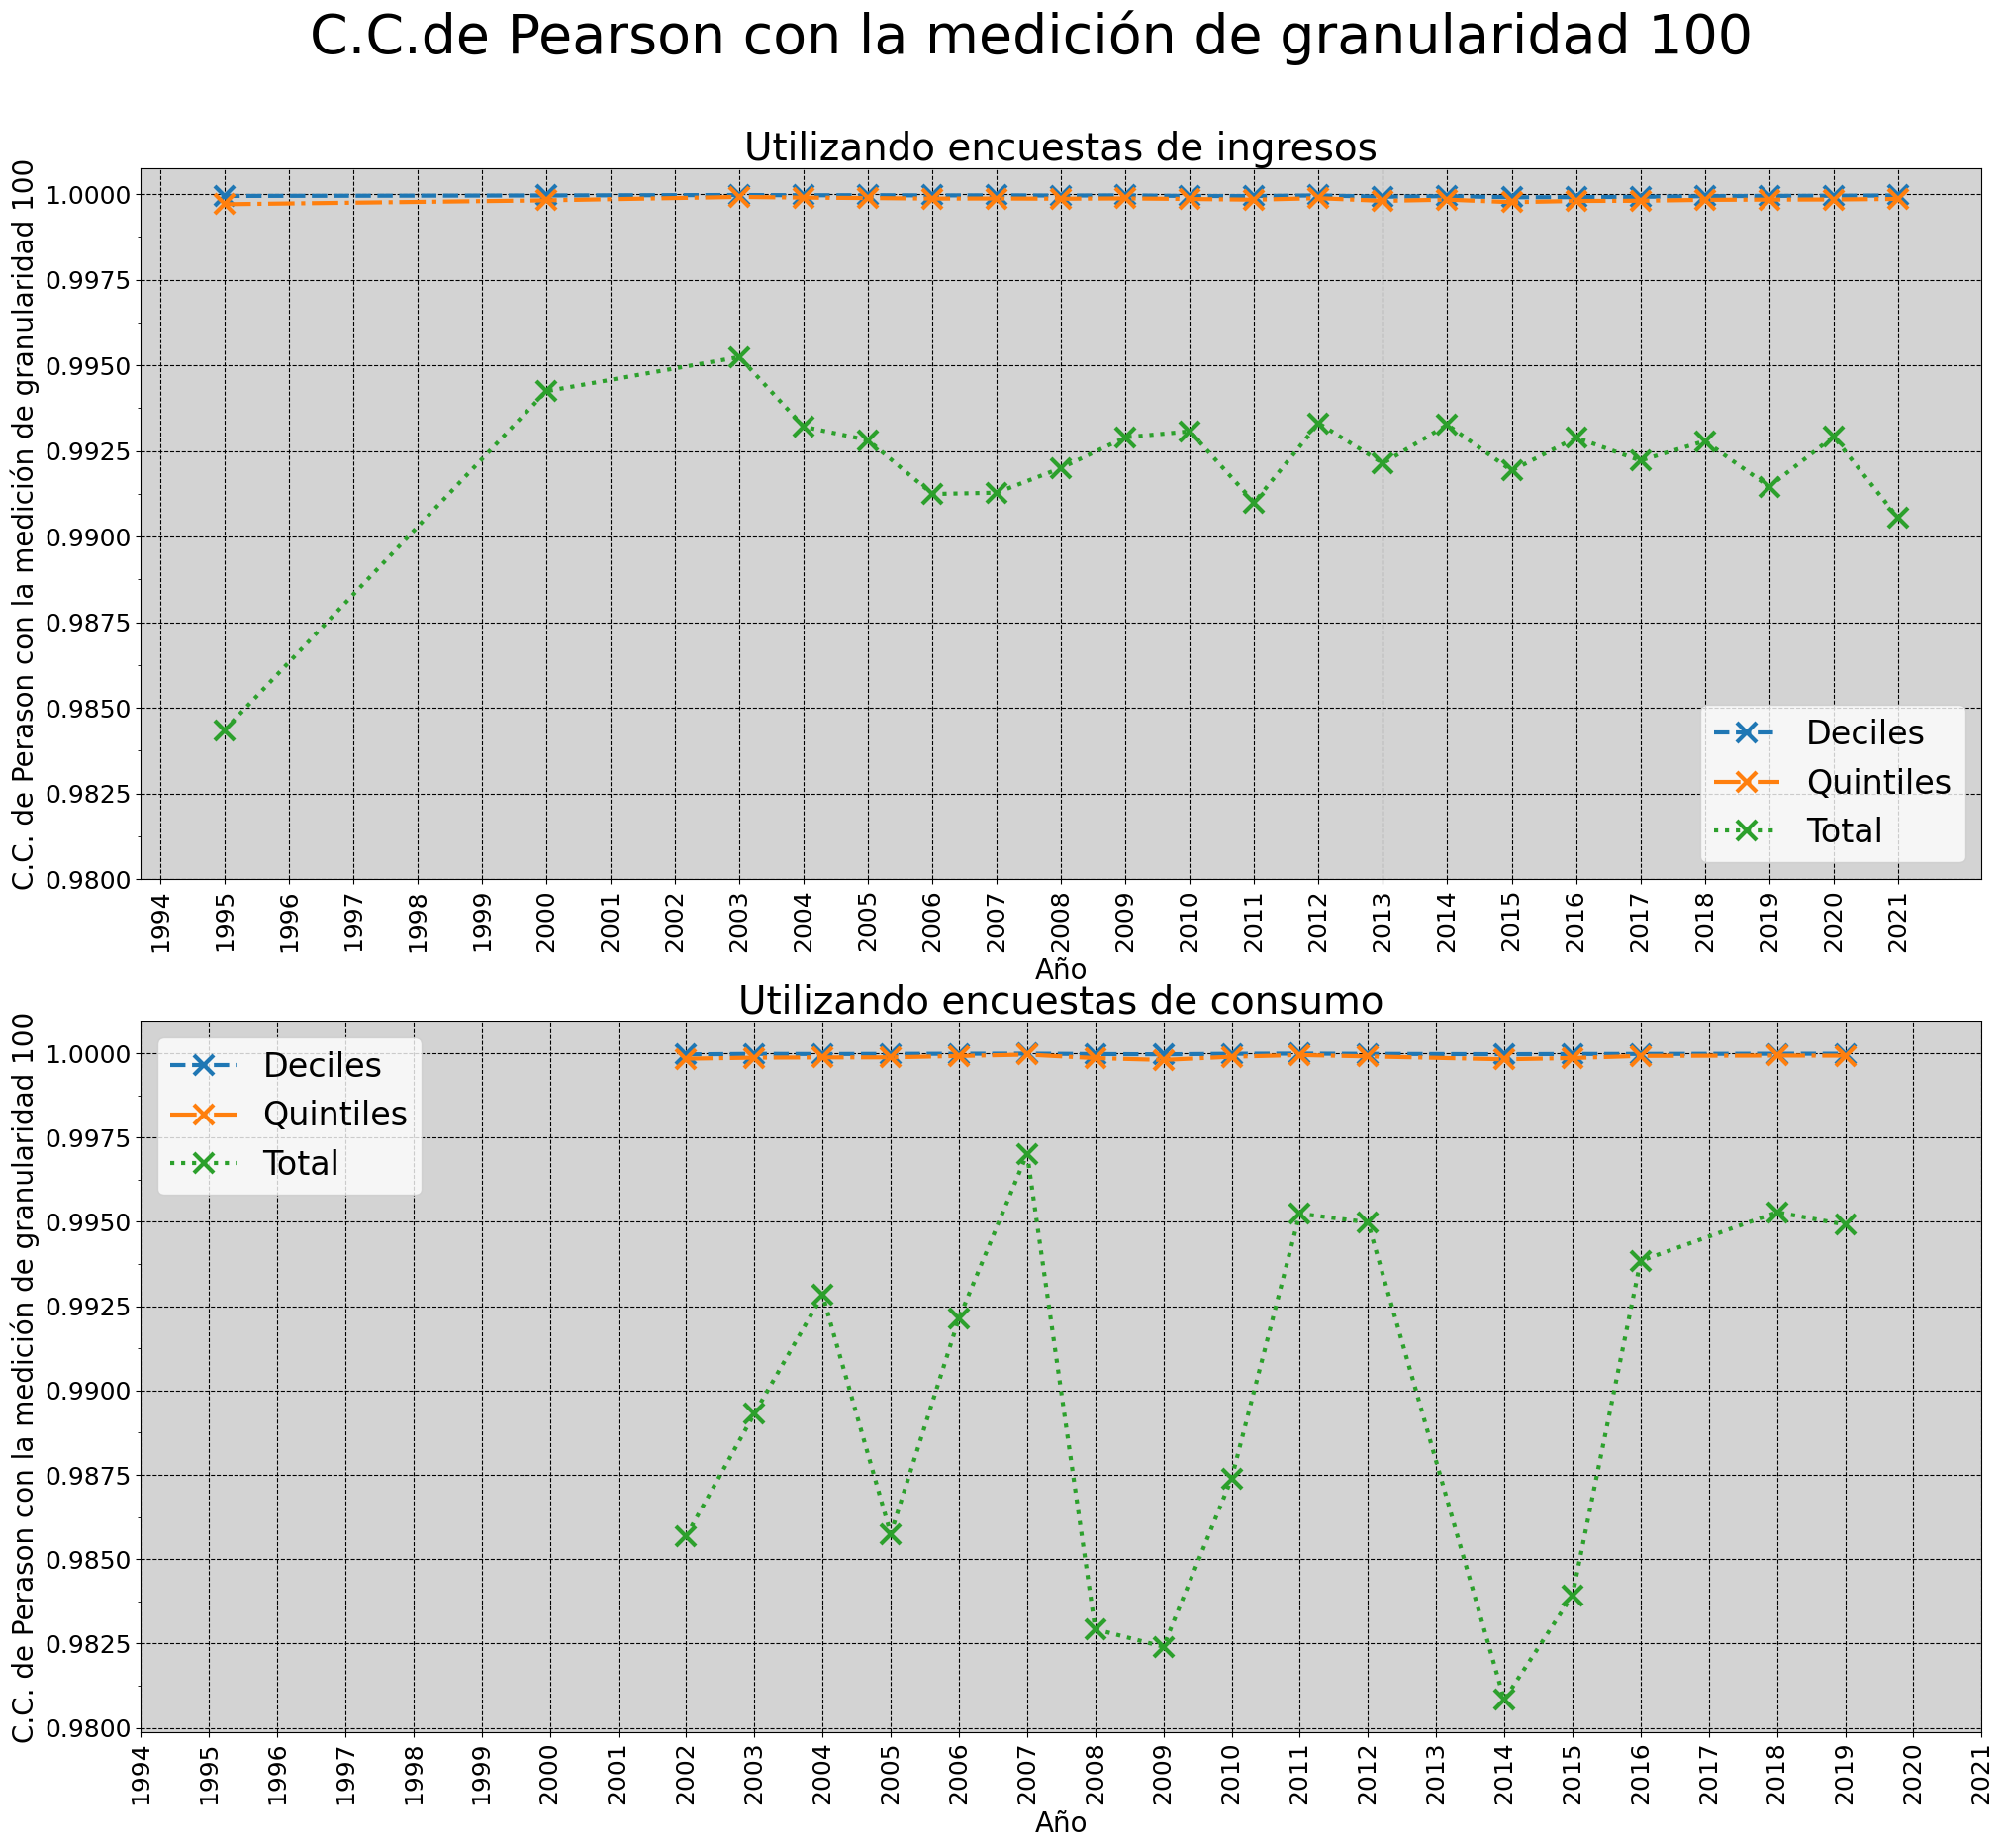

In [11]:
nombres_m = ["ingresos","consumo"]
nombres =  ["Deciles","Quintiles","Total"]
estilos =  ['--','-.',':']

xticks = list(range(1994,2022))
xlabel_ticks = list(map(str, xticks))

yticks_mayor = np.linspace(0.98,1,9)
yticks_mayor_label = list(map(lambda x: f"{x:.4f}",yticks_mayor))
yticks_menor = np.linspace(0.98,1,17)

fig, axs = plt.subplots(2,1, figsize=(24,20))
fig.subplots_adjust(top=0.90) 
fig.suptitle('C.C.de Pearson con la medición de granularidad 100', fontsize=40)

for (ax,muestra,nombre_muestra) in zip(axs,muestras,nombres_m):
    xs, ys = GenerarSeries(muestra, lambda x,y : pearsonr(x,y).correlation)
    for (i, nombre, estilo) in zip(range(len(nombres)),nombres,estilos):
        ax.plot(xs,[y[i] for y in ys], label = nombre, linestyle=estilo, marker='x', linewidth=3, markersize = 15, markeredgewidth=3)
    
    ax.set_ylabel("C.C. de Perason con la medición de granularidad 100", fontsize=20)
    ax.set_xlabel("Año", fontsize=20)
    ax.set_title(f"Utilizando encuestas de {nombre_muestra}", fontsize = 28)
    ax.set_xticks(ticks = xticks, labels= xlabel_ticks, rotation=90, fontsize=18)
    # ax.set_xticks(ticks = xticks, labels=[None]*len(xticks))
    ax.set_yticks(ticks = yticks_mayor, minor=False, labels=yticks_mayor_label, fontsize=18)
    ax.set_yticks(ticks = yticks_menor, minor=True)
    ax.grid(c='black', linestyle='--')
    ax.set_facecolor('lightgray')
    ax.legend(fontsize=24)

plt.show()

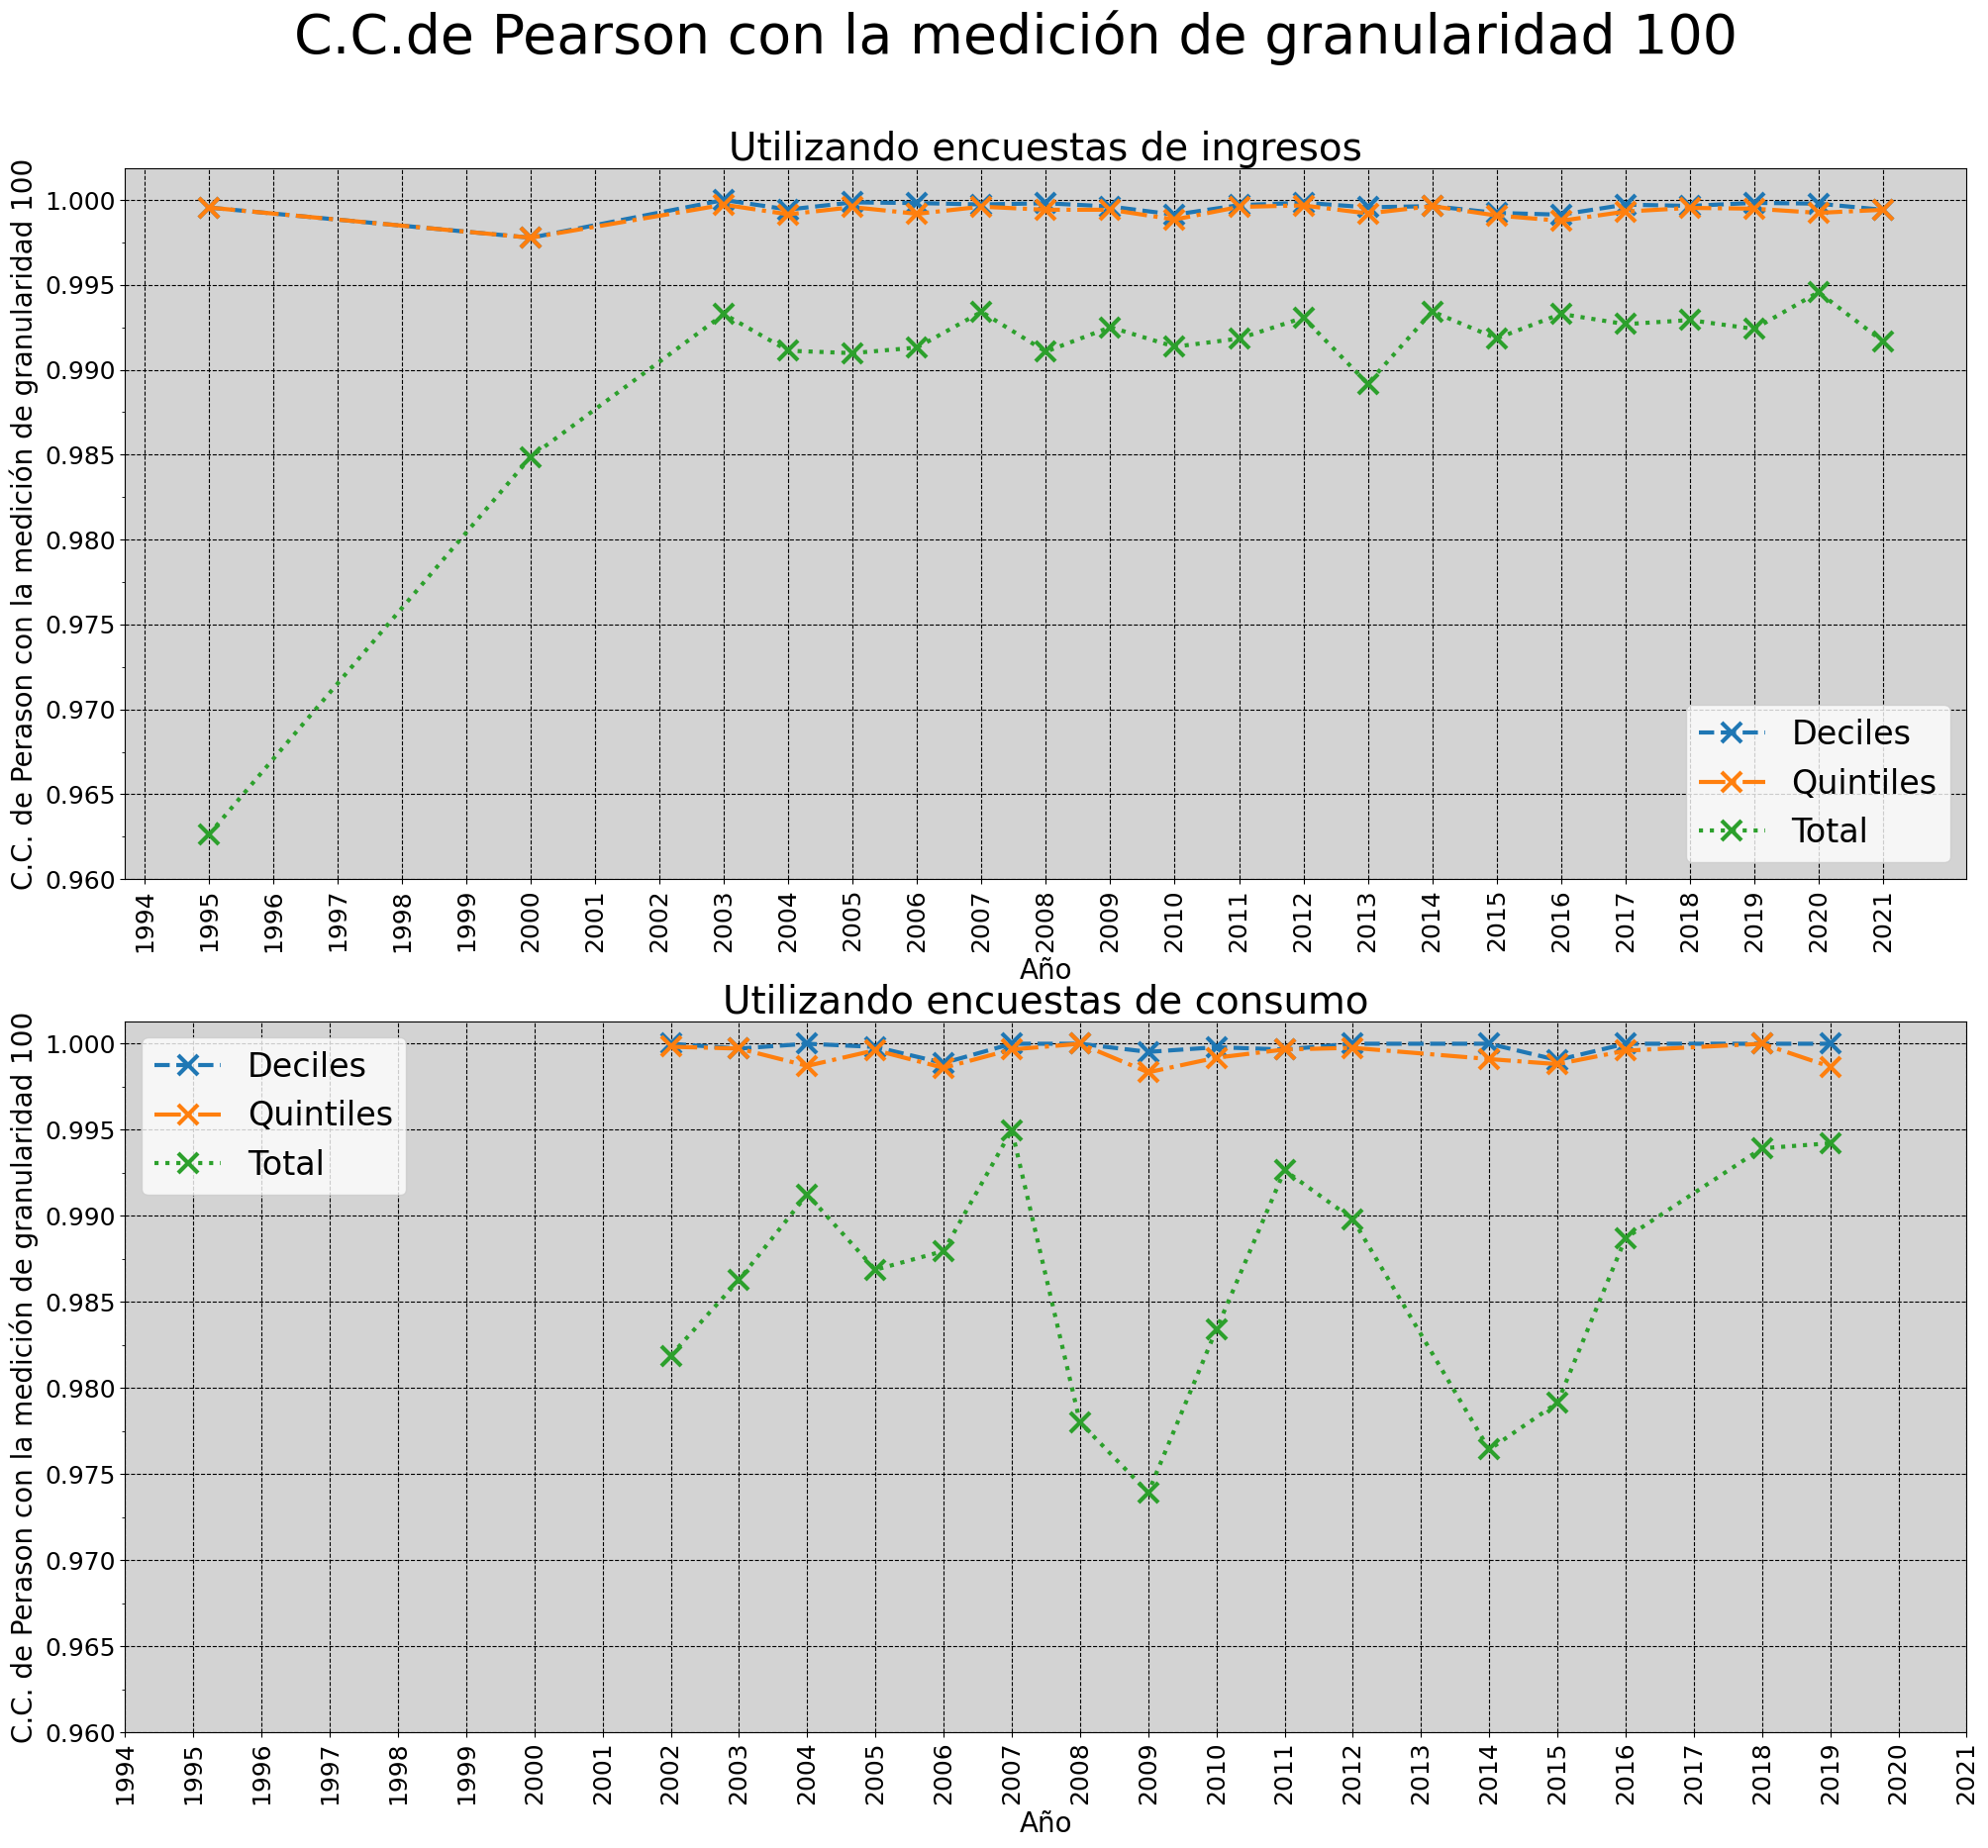

In [15]:
from scipy.stats import spearmanr

nombres_m = ["ingresos","consumo"]
nombres =  ["Deciles","Quintiles","Total"]
estilos =  ['--','-.',':']

xticks = list(range(1994,2022))
xlabel_ticks = list(map(str, xticks))

yticks_mayor = np.linspace(0.96,1,9)
yticks_mayor_label = list(map(lambda x: f"{x:.3f}",yticks_mayor))
yticks_menor = np.linspace(0.96,1,17)

fig, axs = plt.subplots(2,1, figsize=(24,20))
fig.subplots_adjust(top=0.90) 
fig.suptitle('C.C.de Spearman con la medición de granularidad 100', fontsize=40)

for (ax,muestra,nombre_muestra) in zip(axs,muestras,nombres_m):
    xs, ys = GenerarSeries(muestra, lambda x,y : spearmanr(x,y).correlation)
    for (i, nombre, estilo) in zip(range(len(nombres)),nombres,estilos):
        ax.plot(xs,[y[i] for y in ys], label = nombre, linestyle=estilo, marker='x', linewidth=3, markersize = 15, markeredgewidth=3)
    
    ax.set_ylabel("C.C. de Spearman con la medición de granularidad 100", fontsize=20)
    ax.set_xlabel("Año", fontsize=20)
    ax.set_title(f"Utilizando encuestas de {nombre_muestra}", fontsize = 28)
    ax.set_xticks(ticks = xticks, labels= xlabel_ticks, rotation=90, fontsize=18)
    # ax.set_xticks(ticks = xticks, labels=[None]*len(xticks))
    ax.set_yticks(ticks = yticks_mayor, minor=False, labels=yticks_mayor_label, fontsize=18)
    ax.set_yticks(ticks = yticks_menor, minor=True)
    ax.grid(c='black', linestyle='--')
    ax.set_facecolor('lightgray')
    ax.legend(fontsize=24)

plt.show()